In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('CustomerChurn.xlsx')
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [4]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [6]:
df.describe()

,LoyaltyID,Tenure,Monthly Charges,Total Charges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,550382.651001,32.371149,64.761692,2279.734304
std,260776.118690,24.559481,30.090047,2266.794470
min,100346.000000,0.000000,18.250000,0.000000
25%,323604.500000,9.000000,35.500000,398.550000
50%,548704.000000,29.000000,70.350000,1394.550000
75%,776869.000000,55.000000,89.850000,3786.600000
max,999912.000000,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='Churn', ylabel='count'>

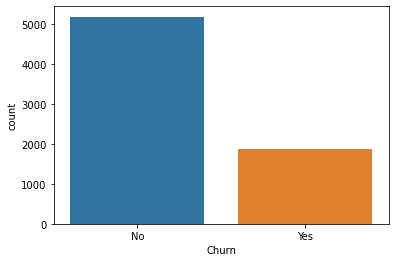

In [7]:
sns.countplot(data=df,x='Churn')

In [11]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='Monthly Charges'>

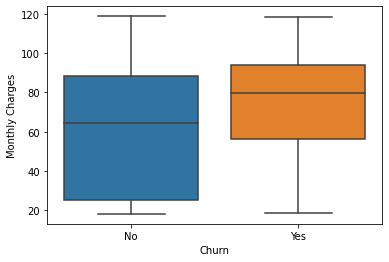

In [12]:
sns.boxplot(data=df,x='Churn',y='Monthly Charges')

<AxesSubplot:xlabel='Churn', ylabel='Total Charges'>

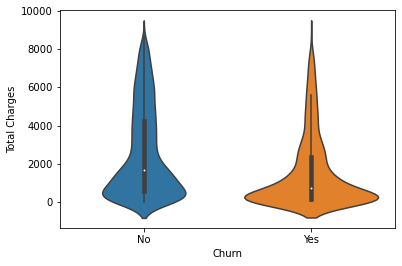

In [9]:
sns.violinplot(data=df,x='Churn',y='Total Charges')

In [10]:
#check null values
df.isna().sum()

LoyaltyID            0
Customer ID          0
Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64

In [13]:
data  = pd.get_dummies(df[['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method','Churn']])
data.head()

,Senior Citizen_No,Senior Citizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,Phone Service_No,Phone Service_Yes,Multiple Lines_No,Multiple Lines_No phone service,...,Contract_One year,Contract_Two year,Paperless Billing_No,Paperless Billing_Yes,Payment Method_Bank transfer (automatic),Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0
1,1,0,1,0,1,0,0,1,1,0,...,1,0,1,0,0,0,0,1,1,0
2,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,1
3,1,0,1,0,1,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,1


In [14]:
corr_df  = pd.get_dummies(df[['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support','Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method','Churn']]).corr()

In [15]:
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                          -0.302253
Device Protection_No internet service      -0.227890
Streaming Movies_No internet service       -0.227890
Streaming TV_No internet service           -0.227890
Tech Support_No internet service           -0.227890
Online Backup_No internet service          -0.227890
Online Security_No internet service        -0.227890
Internet Service_No                        -0.227890
Paperless Billing_No                       -0.191825
Contract_One year                          -0.177820
Online Security_Yes                        -0.171226
Tech Support_Yes                           -0.164674
Dependents_Yes                             -0.164221
Senior Citizen_No                          -0.150889
Partner_Yes                                -0.150448
Payment Method_Credit card (automatic)     -0.134302
Internet Service_DSL                       -0.124214
Payment Method_Bank transfer (automatic)   -0.117937
Payment Method_Mailed check                -0.

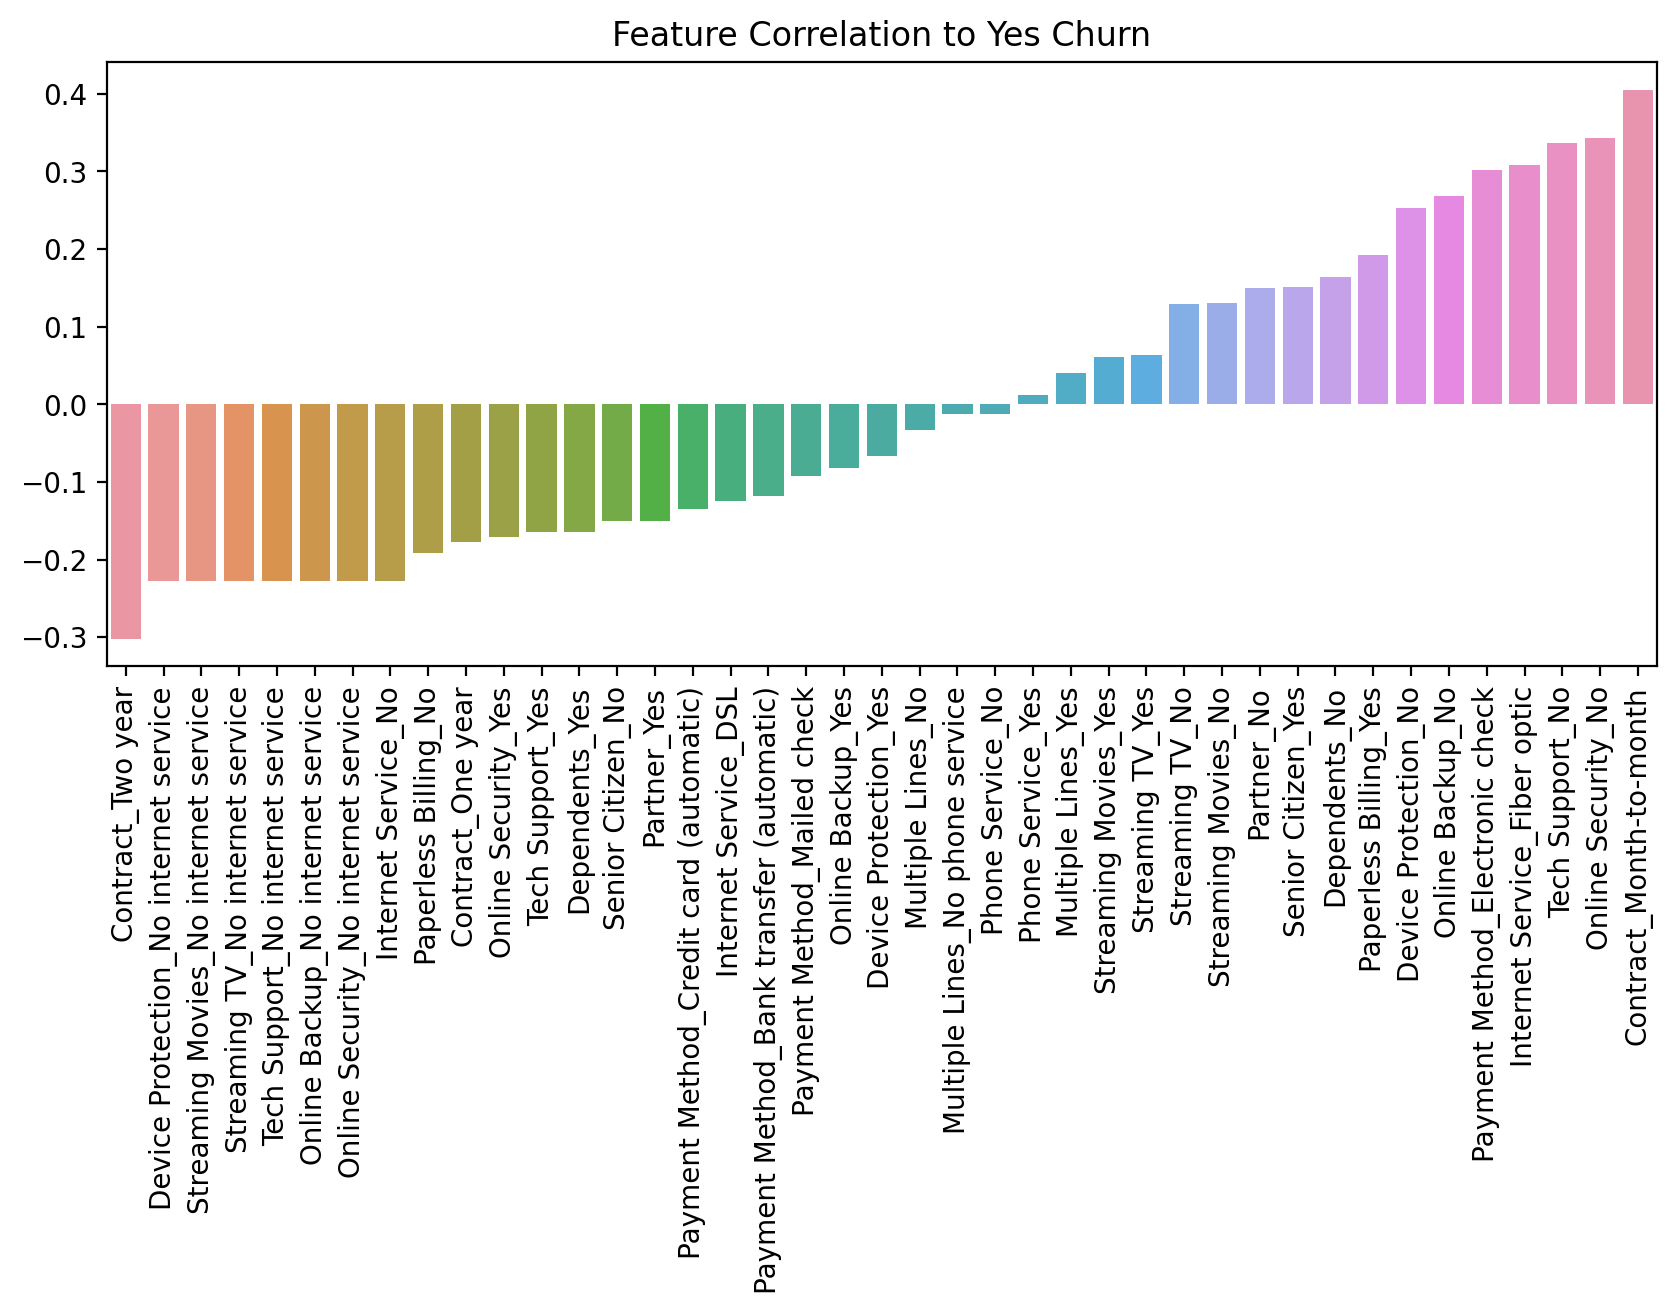

In [16]:
plt.figure(figsize=(10,4),dpi=200)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title("Feature Correlation to Yes Churn")
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Tenure', ylabel='Count'>

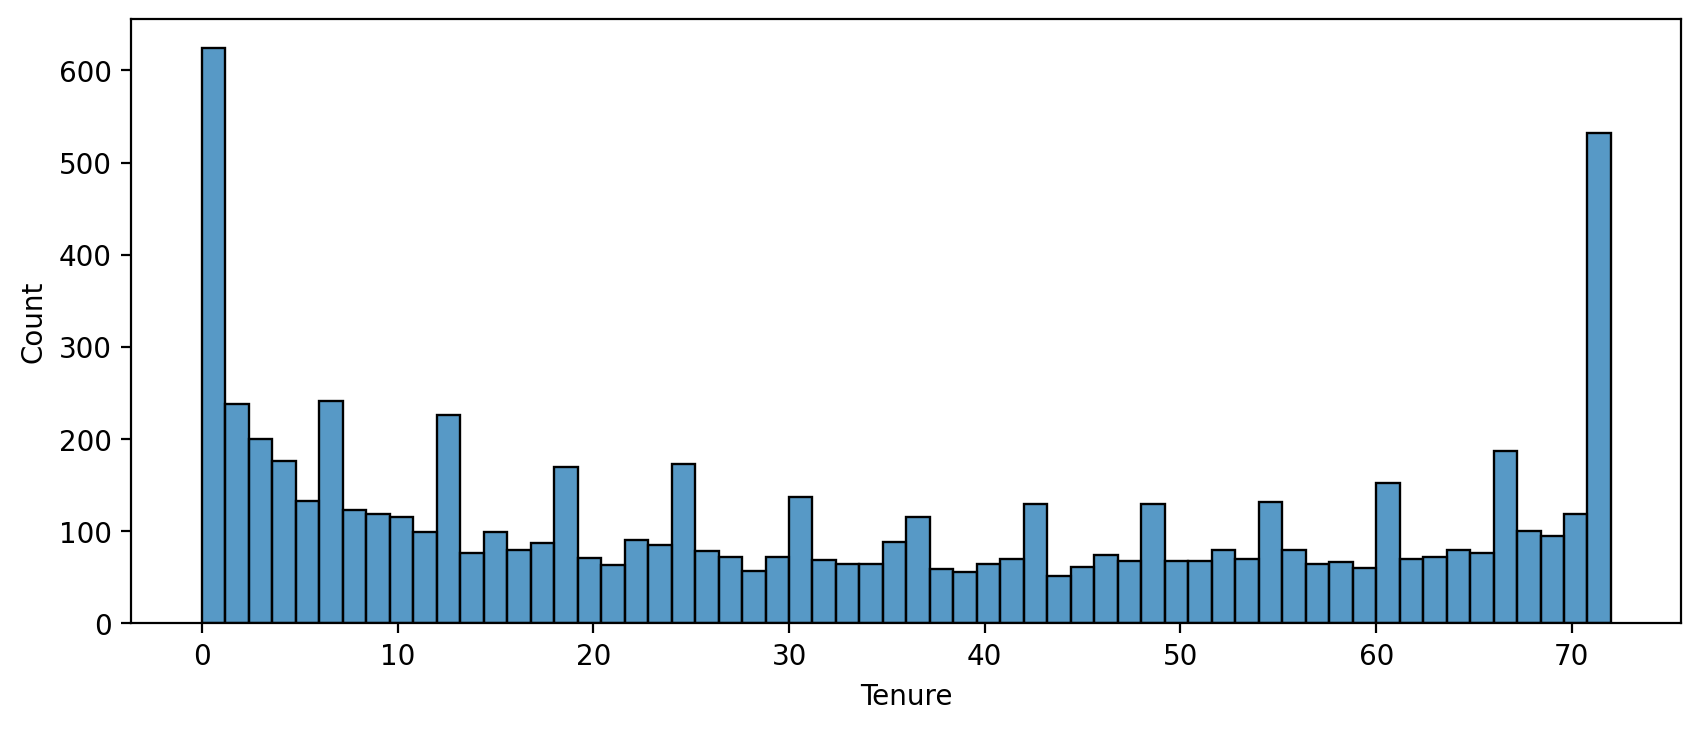

In [17]:
#the amount of months a customer was or has been on a customer
plt.figure(figsize=(10,4),dpi=200)
sns.histplot(data=df,x='Tenure',bins=60)

<Figure size 2000x600 with 0 Axes>

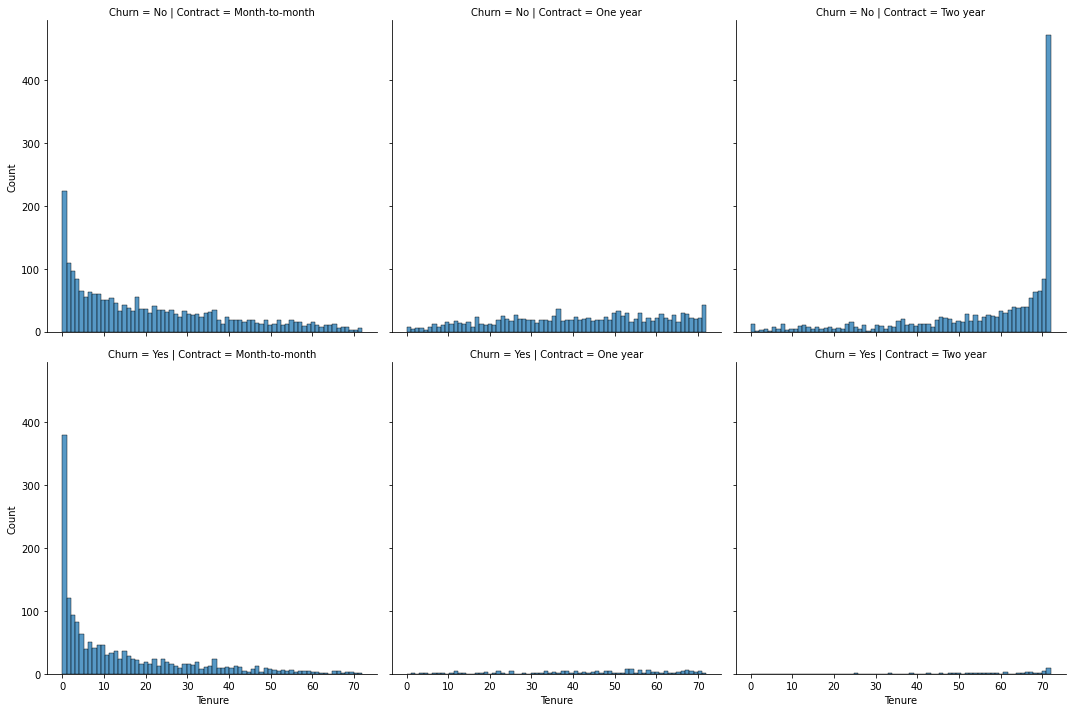

In [27]:
#histograms separated by Churn and Contract
plt.figure(figsize=(10,3),dpi=200)
sns.displot(data=df,x='Tenure',bins=70,col='Contract',row='Churn');

<AxesSubplot:xlabel='Monthly Charges', ylabel='Total Charges'>

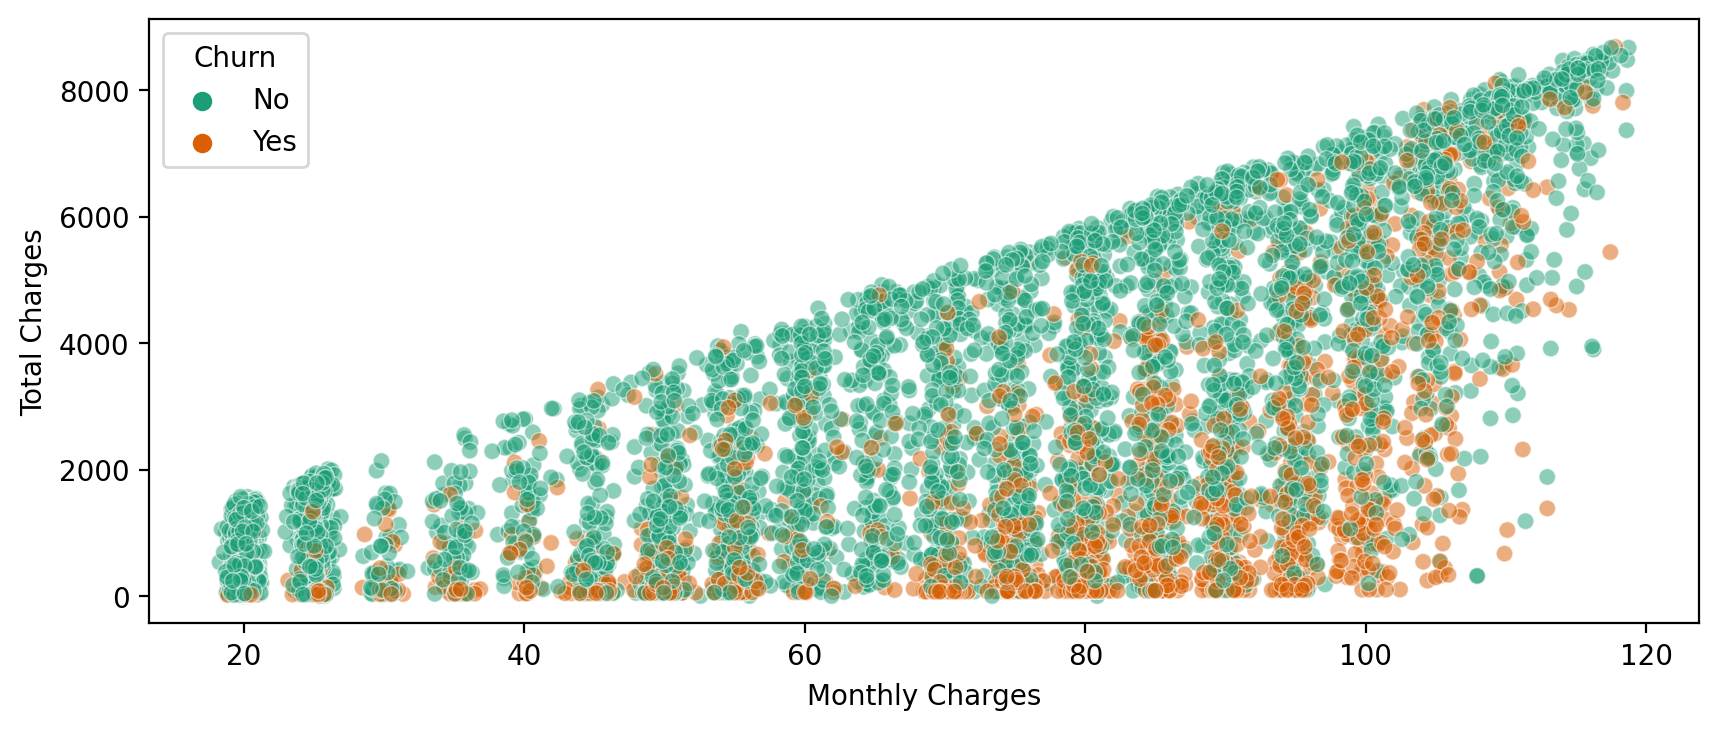

In [18]:
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='Monthly Charges',y='Total Charges',hue='Churn', linewidth=0.5,alpha=0.5,palette='Dark2')

In [19]:
no_churn = df.groupby(['Churn','Tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','Tenure']).count().transpose()['Yes']

In [20]:
churn_rate = 100 * yes_churn / (no_churn+yes_churn)

In [21]:
churn_rate.transpose()['Customer ID']

Tenure
0           NaN
1     61.990212
2     51.680672
3     47.000000
4     47.159091
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: Customer ID, Length: 73, dtype: float64

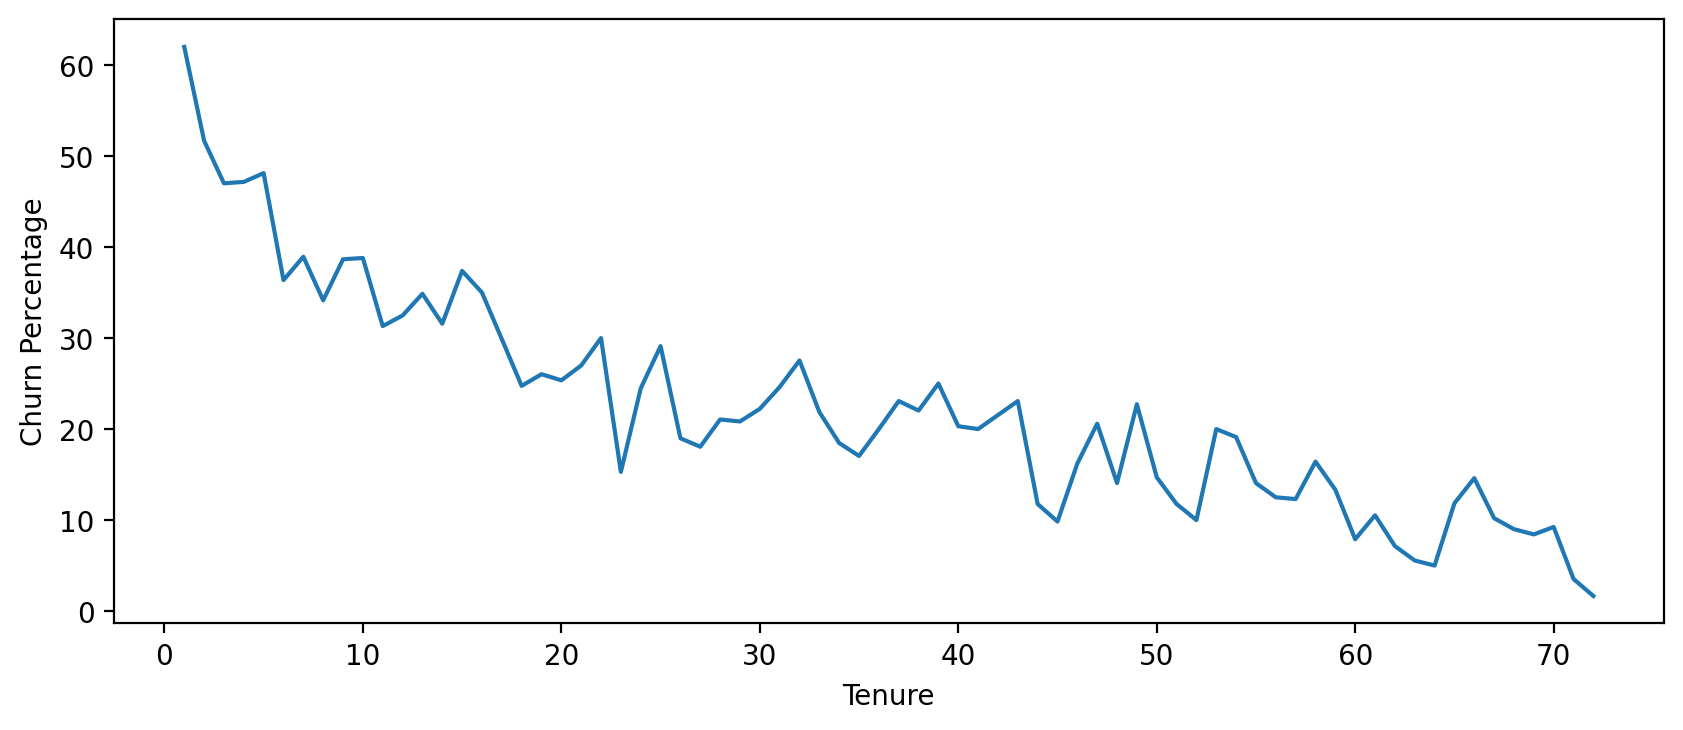

In [22]:
# plot churn rate per months of tenure
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

In [23]:
#cohort analysis
def cohort(Tenure):
    if Tenure < 13:
        return '0-12 Months'
    elif Tenure < 25:
        return '12-24 Months'
    elif Tenure < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"

In [24]:
df['Tenure Cohort'] = df['Tenure'].apply(cohort)

<AxesSubplot:xlabel='Tenure Cohort', ylabel='count'>

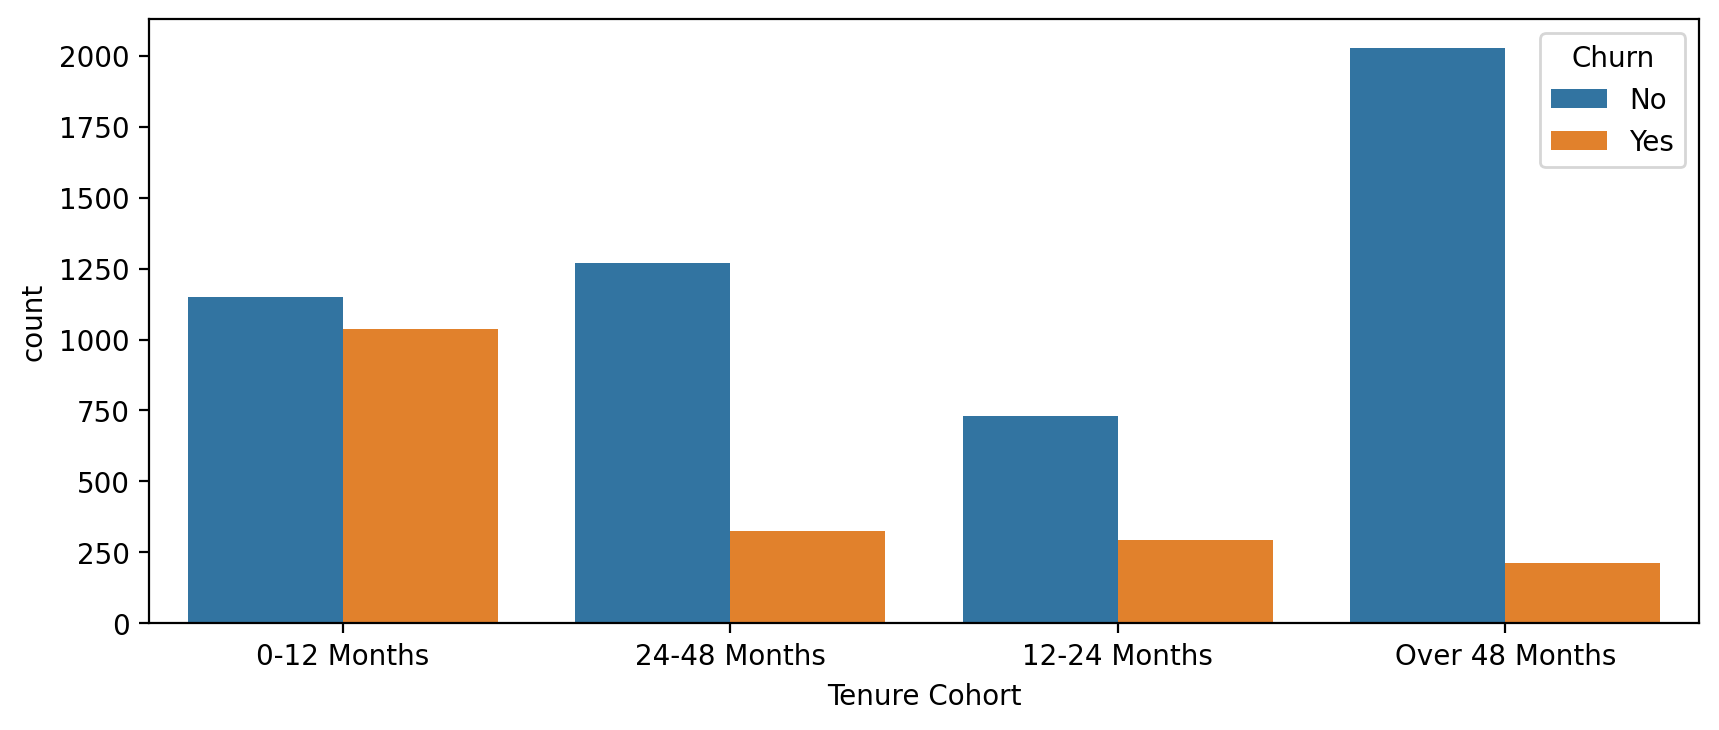

In [25]:
plt.figure(figsize=(10,4),dpi=200)
sns.countplot(data=df,x='Tenure Cohort',hue='Churn')

<Figure size 2000x800 with 0 Axes>

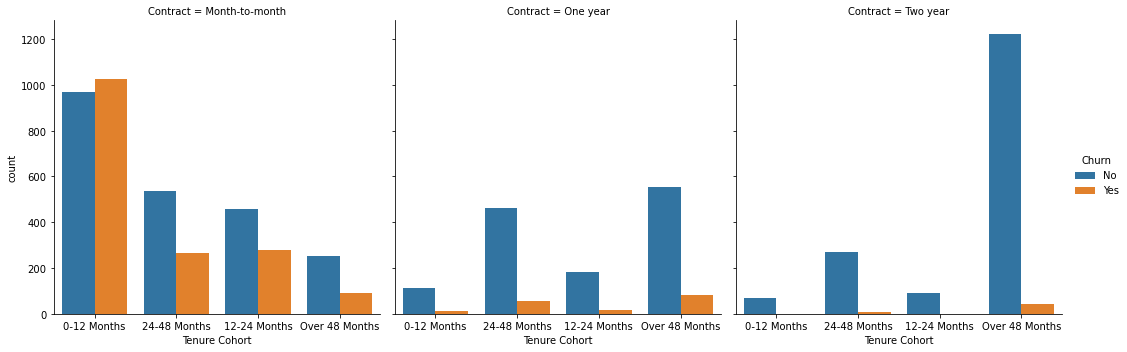

In [26]:
plt.figure(figsize=(10,4),dpi=200)
sns.catplot(data=df,x='Tenure Cohort',hue='Churn',col='Contract',kind='count')

<AxesSubplot:xlabel='Monthly Charges', ylabel='Total Charges'>

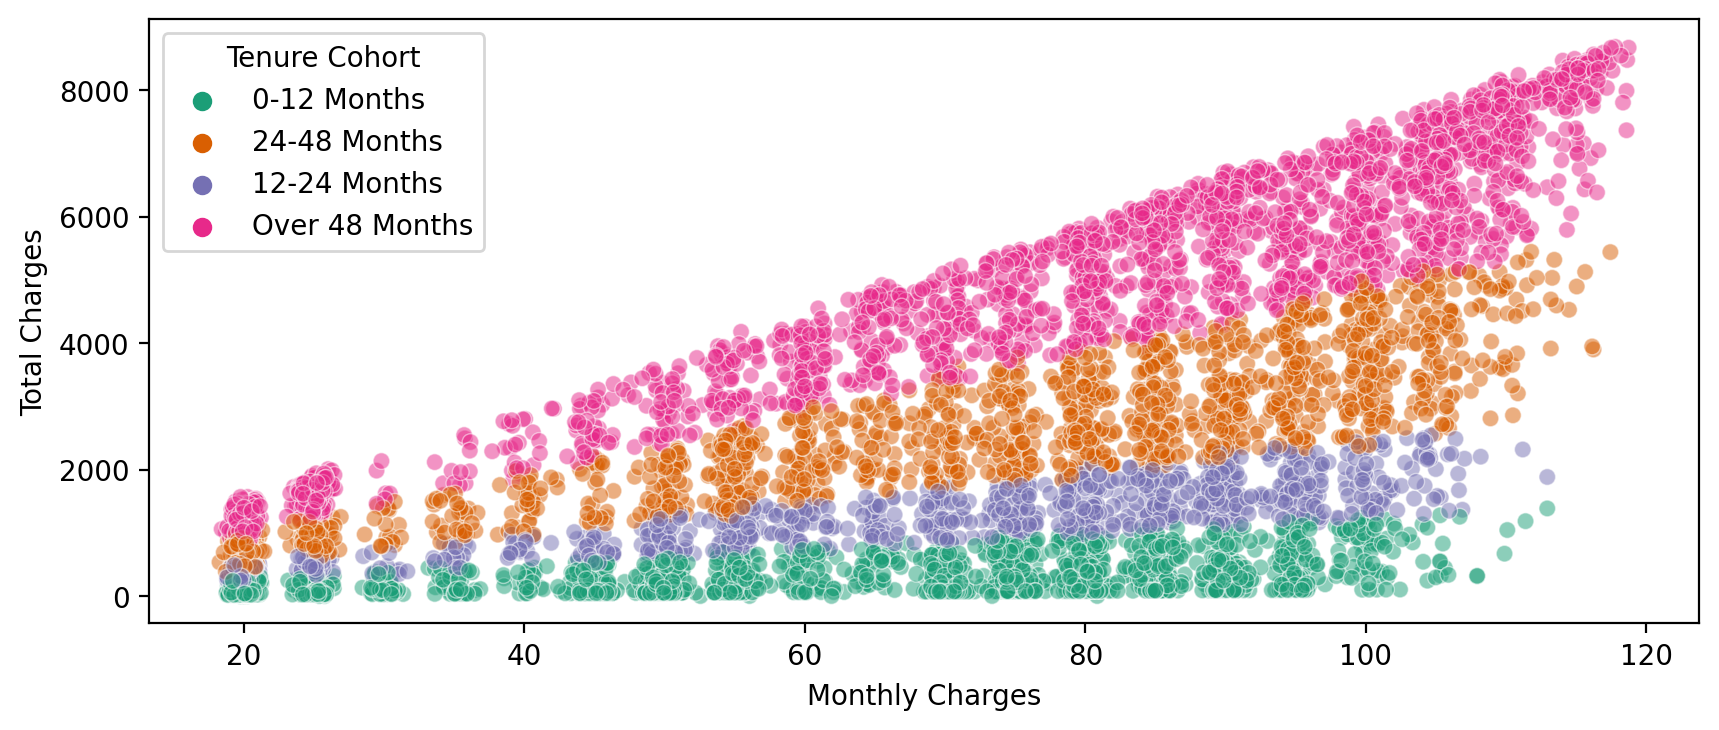

In [28]:
#Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort 
plt.figure(figsize=(10,4),dpi=200)
sns.scatterplot(data=df,x='Monthly Charges',y='Total Charges',hue='Tenure Cohort', linewidth=0.5,alpha=0.5,palette='Dark2')
